---
format:
  html:
    embed-resources: true
    code-fold: true
    code-summary: "Show Code"
---

# Data Exploration

## Data Understanding: 

The general packages I used and setting the theme of graphs:

In [2]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Apply the default theme
sns.set_theme(style="whitegrid", palette="pastel")


Loading in the dataset to EDA:

In [3]:
#Import both Challenger and all other ranks Datasets (combined dataset)
combined_league_ranks = pd.read_csv('../../data/cleaned_riot_data/league_combined_with_chall_cleaned.csv')

#Print the first few rows of the dataset
print(combined_league_ranks.head())

     win  kills  deaths  dmgObj  dmgTurr  vision_score  totalDmg  \
0   True      3       2    6298     6298            10    148123   
1  False      7       5    3222      424            15    116804   
2   True     16       1   12446     2012            13    110153   
3   True     13       2   10605     4966             9    148142   
4   True      1       2    1430     1075            25     14254   

   totalDmgTaken  totalMinions   gold position       time  rank  
0          24127           197  11108   middle  29.150000  iron  
1          24526           144  12407   middle  29.916667  iron  
2          12996           145  13989   middle  28.433333  iron  
3          26504           192  14154   middle  26.516667  iron  
4          10728            19   7288  utility  25.100000  iron  


#### A Glance at the Dataset
After briefly looking at the dataset that I collected and cleaned, I notice that there are many unique variables being used in the columns. Namely there are __13 variables__ that I can look into individually. From the dataset, I can tell that it is mostly numeric data with one float variable (```time```), two string variables (```rank``` and ```position```), and one Boolean column (```win```). The rest being numeric variables. For the sake of my later analysis with Naive Bayes, I will assume that these variables are independent. However, I believe there are some major correlation with these variables. One that sticks out to me is the time column with columns like gold earned, minions killed, and total damage dealt. From domain knowledge, these variables inevitably increase as you keep playing in a match. I think I might need to change some columns to scale by time in minutes and then remove the time column. <br><br>

So after dealing with the issue of time in the dataset, I think the ideal approach is to utilize the features to make a model that can predict an unseen match data to a specific rank. This would require me to split the dataset for training and testing. <br><br>

For this Exploratory Data Analysis section, I will look into each numeric variable and categorical variables with mean and median to explain the overall trend from lowest to highest rank. For some variables I will also look into the standard deviation to see how varied the values are per rank.

## Descriptive Statistics:

#### Frequency of Each Rank in Dataset

Text(0.5, 1.0, 'Frequency of Each Class')

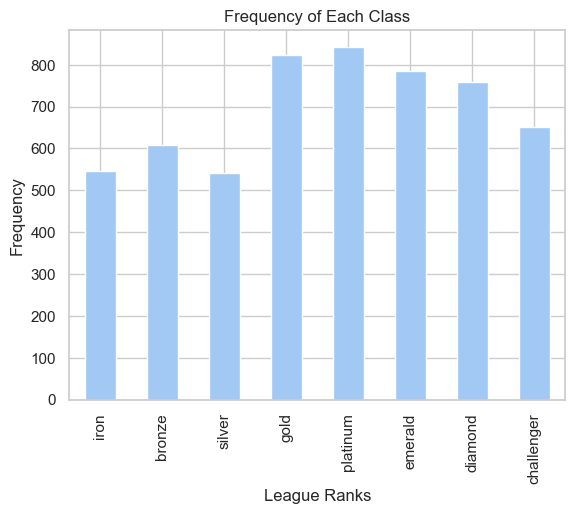

In [4]:
#Lets visualize some basic statistics:
#Lets see the frequency of matches for each category of rank:
rank_freq = combined_league_ranks['rank'].value_counts()
#Bar graph plot it
#Rank order from lowest to highest rank (left to right)
rank_order = ['iron', 'bronze', 'silver', 'gold', 'platinum', 'emerald', 'diamond', 'challenger']
rank_freq[rank_order].plot(kind='bar')
plt.xlabel('League Ranks')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class')

From this simple frequency bar plot of the categorical variable ```"rank"```, we can see that when I pulled about 200 players in each rank and got their 10 most recent matches that ranks from gold and above have a higher density of ranked games being played compared to lower ranks. One could thus infer that these ranked players prefer to play more ranked solo/duo queue games than lower ranks.

#### Frequency of Position in the Dataset

Text(0.5, 1.0, 'Frequency of Each Position')

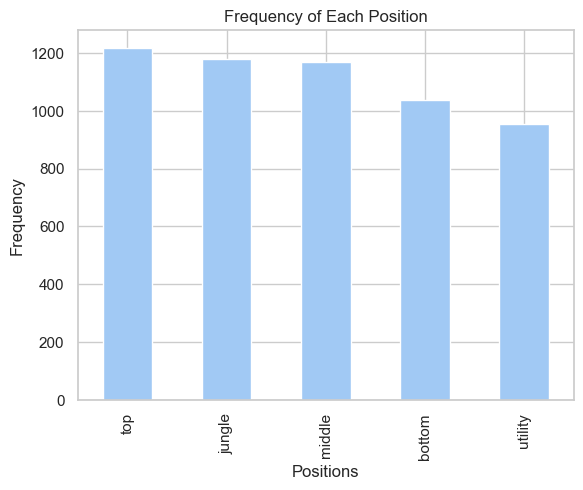

In [5]:
#Get the freq of each Position in Dataset
position_freq = combined_league_ranks['position'].value_counts()
#Bar graph plot it
#Rank order from lowest to highest rank (left to right)
position_freq.plot(kind='bar')
plt.xlabel('Positions')
plt.ylabel('Frequency')
plt.title('Frequency of Each Position')

Across all ranks in this dataset, this plot shows the overall frequency of each position played. ```Top``` lane is played the most followed by ```jungle```, then ```middle``` lane, then ```bottom``` lane, and finally ```utility``` or ```support```. 

#### Mean and Median of Gold Earned Rate in Each Rank

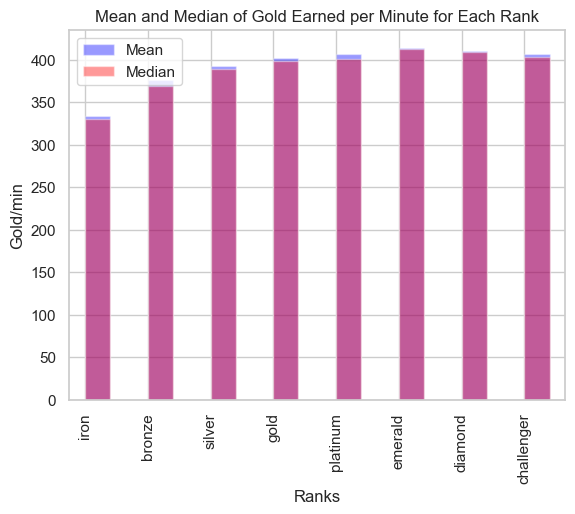

In [7]:
#First change gold column to rate earned per minute (time col)
combined_league_ranks['gold/min'] = combined_league_ranks['gold']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median for gold variable
gold_mean_med_df = combined_league_ranks.groupby('rank')['gold/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
gold_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
gold_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('Gold/min')
plt.title('Mean and Median of Gold Earned per Minute for Each Rank')
plt.legend()
plt.show()


Firstly, the Mean (blue) and Median (red) are generally very close together as seen in the plot as most of it is purple (blue overlapping with the red). Next, in this simple plot we can see that as you move up in rank that the players are __more efficient at obtaining gold__ as the rate (````gold earned per minute````) noticeably goes up as you examine higher ranks. 

#### Mean and Median of Total Damage Rate in Each Rank

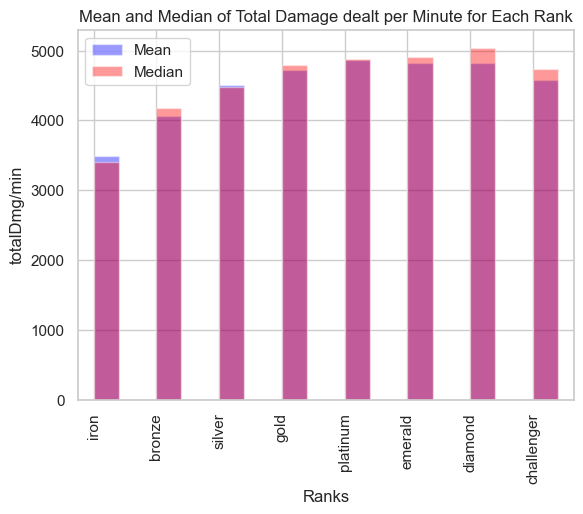

In [8]:
#Follow the same exact pattern as gold earned per minute but for total damage dealt
combined_league_ranks['totalDmg/min'] = combined_league_ranks['totalDmg']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
totalDmg_mean_med_df = combined_league_ranks.groupby('rank')['totalDmg/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
totalDmg_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
totalDmg_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('totalDmg/min')
plt.title('Mean and Median of Total Damage dealt per Minute for Each Rank')
plt.legend()
plt.show()

Similar to the ```gold earned per minute```, there is general upward trend of ```total damage dealt per minute``` as the rank goes up. 

#### Mean and Median of Player Kill Rate in Each Rank

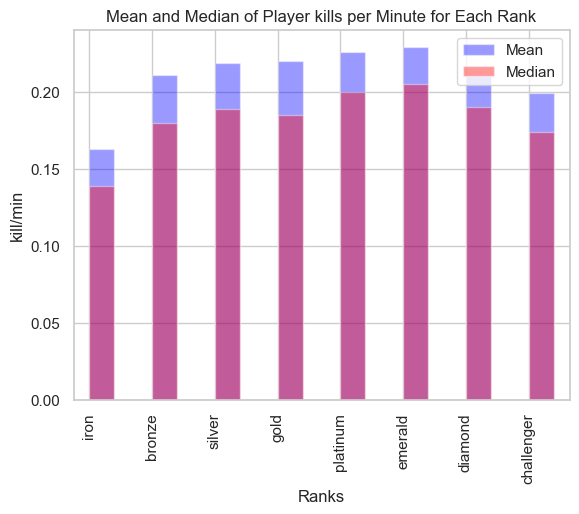

In [9]:
#Follow the same exact pattern as gold earned per minute but for total player kills
combined_league_ranks['kills/min'] = combined_league_ranks['kills']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
kill_mean_med_df = combined_league_ranks.groupby('rank')['kills/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
kill_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
kill_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('kill/min')
plt.title('Mean and Median of Player kills per Minute for Each Rank')
plt.legend()
plt.show()

This has a generally less obvious trend. ```Player kill rate per minute``` seems to be consistent across ```ranks``` from bronze and up. Iron players have noticeably less ```kills/min``` and, actually, ```Challenger``` players surprisingly have somewhat less ```kills/min``` as well than the middle ranks. 

#### Mean and Median of Player Death Rate in Each Rank

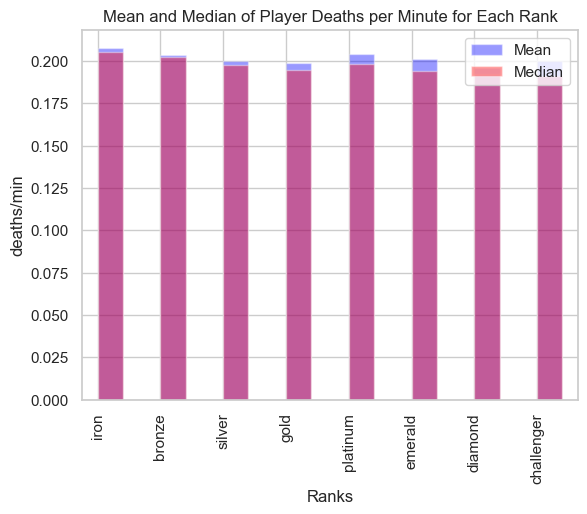

In [10]:
#Follow the same exact pattern as gold earned per minute but for total player deaths
combined_league_ranks['deaths/min'] = combined_league_ranks['deaths']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
death_mean_med_df = combined_league_ranks.groupby('rank')['deaths/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
death_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
death_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('deaths/min')
plt.title('Mean and Median of Player Deaths per Minute for Each Rank')
plt.legend()
plt.show()

For player ```deaths per minute```, the rate seems pretty consistent across all ranks. Though it does seem a tiny bit higher in the lower ranks compared the the higher ranks like ```Challenger``` and ```Diamond```. This could mean that players are more careful to not die throughout the game.

#### Mean and Median of Damage to Objectives Dealt Rate in Each Rank

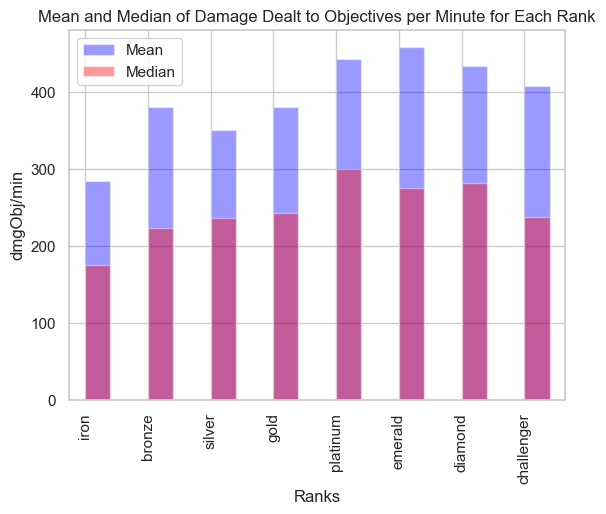

In [12]:
#Follow the same exact pattern as gold earned per minute but for total dmg dealt to objectives
combined_league_ranks['dmgObj/min'] = combined_league_ranks['dmgObj']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
dmgObj_mean_med_df = combined_league_ranks.groupby('rank')['dmgObj/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
dmgObj_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
dmgObj_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('dmgObj/min')
plt.title('Mean and Median of Damage Dealt to Objectives per Minute for Each Rank')
plt.legend()
plt.show()

The rate for this variable seems to vary a lot across all ranks. This could be a variable that is useful in classifying a rank on unseen data. <br><br>
Overall though, the trend follows an upward trend like for gold earned where higher ranks ```damage objectives``` more or more efficiently. 

#### Mean and Median of Damage to Turrets Dealt Rate in Each Rank

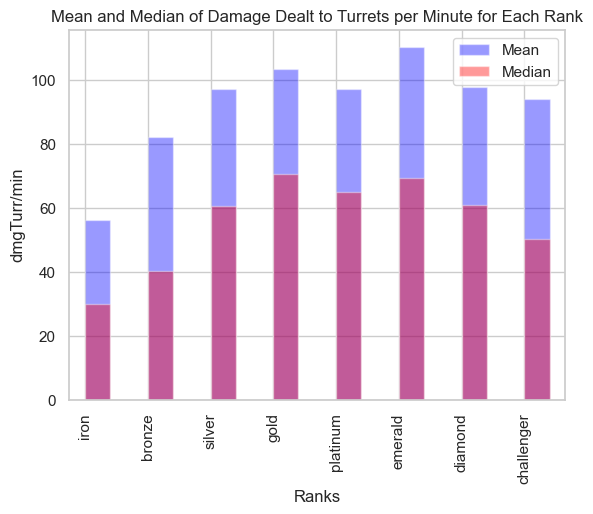

In [13]:
#Follow the same exact pattern as gold earned per minute but for total dmg dealt to turrets
combined_league_ranks['dmgTurr/min'] = combined_league_ranks['dmgTurr']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
dmgTurr_mean_med_df = combined_league_ranks.groupby('rank')['dmgTurr/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
dmgTurr_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
dmgTurr_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('dmgTurr/min')
plt.title('Mean and Median of Damage Dealt to Turrets per Minute for Each Rank')
plt.legend()
plt.show()

This is similarly varied like ```Objective damage```. This could also be a feature that is important in predicting rank. This also shows higher ranks doing more damage to turrets but ```Challenger``` players unexpectedly do less than the middle ranks. Sieging enemy turrets might not matter as well among the highest level of players?

#### Mean and Median of Vision Score Rate in Each Rank

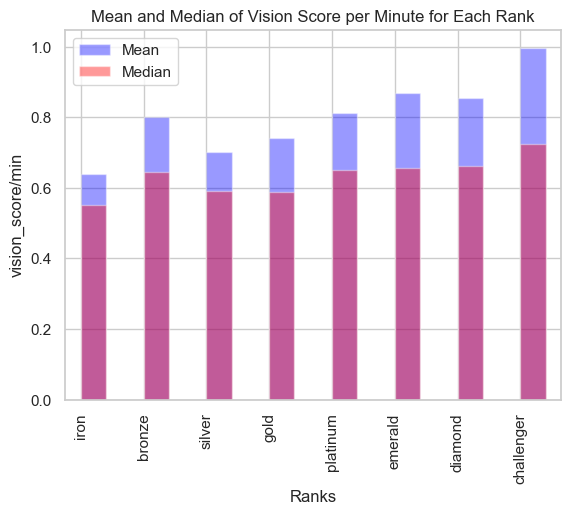

In [14]:
#Follow the same exact pattern as gold earned per minute but for vision score
combined_league_ranks['vision_score/min'] = combined_league_ranks['vision_score']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
vision_score_mean_med_df = combined_league_ranks.groupby('rank')['vision_score/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
vision_score_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
vision_score_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('vision_score/min')
plt.title('Mean and Median of Vision Score per Minute for Each Rank')
plt.legend()
plt.show()

```Vision score``` across the map is an important role for every player as it means control over the information across the entire map. The variation between median and mean is higher for ```vision score``` than variables like ```gold earned``` and ```total damage dealt``` which could be related to the different positions players play as recorded in the dataset. In general though, there is higher ```vision score``` as you go higher up in rank. ```Bronze``` rank is somewhat an outlier though.

#### Mean and Median of Total Damage Taken Rate in Each Rank

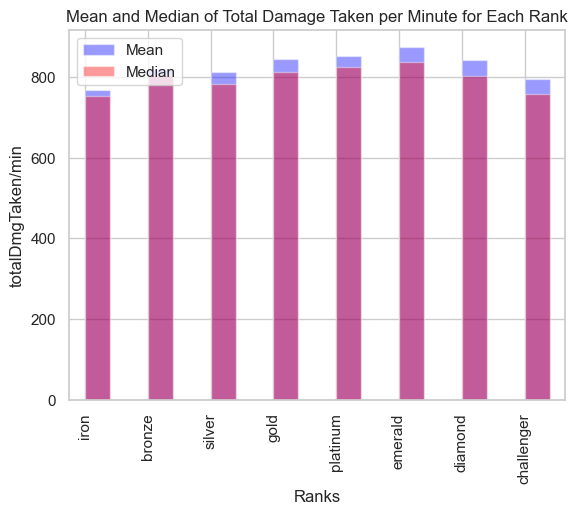

In [15]:
#Follow the same exact pattern as gold earned per minute but for damage taken
combined_league_ranks['totalDmgTaken/min'] = combined_league_ranks['totalDmgTaken']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
totalDmgTaken_mean_med_df = combined_league_ranks.groupby('rank')['totalDmgTaken/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
totalDmgTaken_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
totalDmgTaken_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('totalDmgTaken/min')
plt.title('Mean and Median of Total Damage Taken per Minute for Each Rank')
plt.legend()
plt.show()

The trend of ```total damage dealt``` might be related to ```total damage taken```. With lower damage dealt that also means lower damage taken. Logically, a better rated player would be able to deal more damage while taking minimal damage. The lowest rank ```Iron``` had the lowest damage dealt which means a low total damage taken might have some correlation to that variable. Otherwise, this variable seems consistent across the other ranks except ```Challenger``` which also shows a lower value. 

#### Mean and Median of Total Minions Farmed Rate in Each Rank

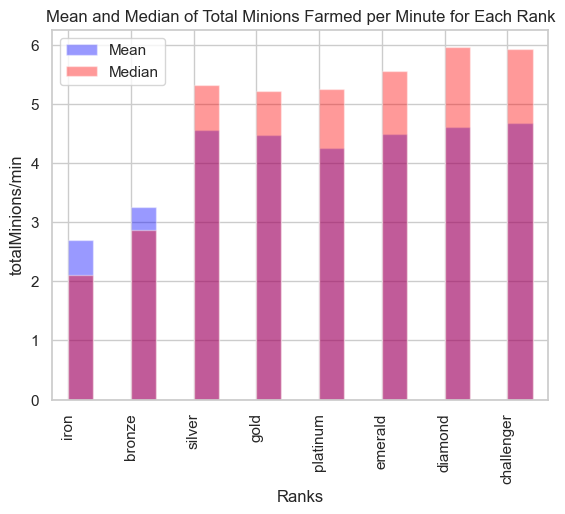

In [16]:
#Follow the same exact pattern as gold earned per minute but for total minions farmed
combined_league_ranks['totalMinions/min'] = combined_league_ranks['totalMinions']/combined_league_ranks['time']

#Group dataset by class then .agg() to get mean and median
totalMinions_mean_med_df = combined_league_ranks.groupby('rank')['totalMinions/min'].agg(['mean', 'median']).reindex(rank_order).reset_index()

#Now plot together in one plot
fig, ax = plt.subplots()
#mean plot
totalMinions_mean_med_df.plot(kind='bar', x='rank', y='mean', ax=ax, position=0, width=0.4, color='blue', label='Mean', alpha=0.4)
#median plot
totalMinions_mean_med_df.plot(kind='bar', x='rank', y='median', ax=ax, position=0, width=0.4, color='red', label='Median', alpha=0.4)
#labels, legend, title
plt.xlabel('Ranks')
plt.ylabel('totalMinions/min')
plt.title('Mean and Median of Total Minions Farmed per Minute for Each Rank')
plt.legend()
plt.show()

```Minions``` are the number of entity mobs in the game that appear in waves occasionally going down 3 lanes. These entities are a big source of gold for players. To have the ability of farming these entities efficiently throughout the game can determine how strong a player is at every time point. For the first time, the medians for ranks ```Silver``` and above have higher medians than means. This could be related to how the role ```"utility"``` tends to not farm for gold but focuses on vision or support fighting. 

## Data Visualizations

#### Possible Relationship: Total Damage Dealt vs Total Damage Taken

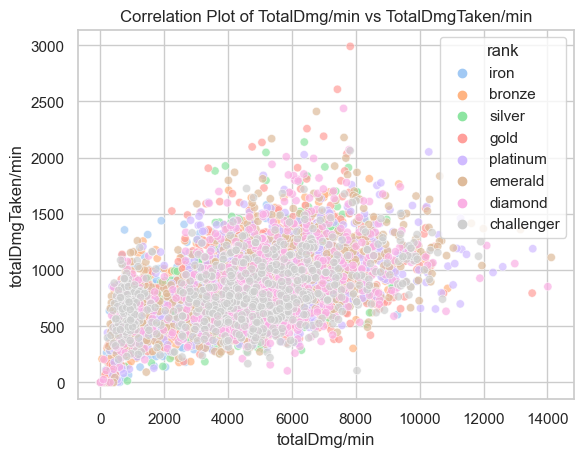

In [17]:
#scatterplot generation for totalDmg/min (x-axis) vs totalDmgTaken/min (y-axis) variables
sns.scatterplot(x=combined_league_ranks['totalDmg/min'], y=combined_league_ranks['totalDmgTaken/min'], hue=combined_league_ranks['rank'], alpha=0.7)
plt.title("Correlation Plot of TotalDmg/min vs TotalDmgTaken/min")
plt.xlabel("totalDmg/min")
plt.ylabel("totalDmgTaken/min")
plt.show()

The scatterplot seems to show some sort of relationship between the variables and so I will try a regression line for each rank to clarify...

c:\Users\xusha\anaconda3\envs\dsan5000\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


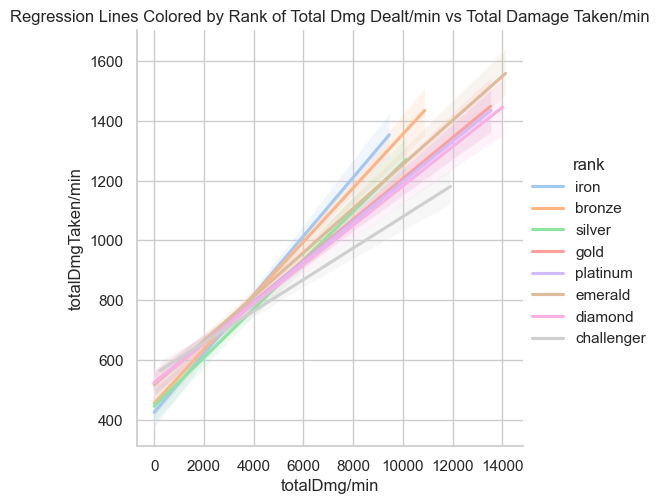

In [18]:
#Now do regression line for the same variables as above ^
sns.lmplot(data=combined_league_ranks, x='totalDmg/min', y='totalDmgTaken/min', hue='rank', scatter=False)  # Add regression line

plt.title('Regression Lines Colored by Rank of Total Dmg Dealt/min vs Total Damage Taken/min')
plt.xlabel('totalDmg/min')
plt.ylabel('totalDmgTaken/min')
plt.show()

Variation of the regression lines for each rank appears to increase at the beginning and towards the end. However, the correlation of the two variables (```total damage dealt per minute``` versus ```total damage taken per minute```) does seem to vary less towards the middle-ish of the line. Additionally these lines seemingly cross at where the variation of the line is somewhat at a minimum for each rank shown in the plot. This is significant because it kinda tells us that this correlation might be found similarly across all ranks. Finally, the lines each have a positive slope which adds evidence to the correlation between the two variables of ```'totalDmg/min'``` and ```'totalDmgTaken/min'```.

#### Possible Relationship: Gold Earned versus Deaths

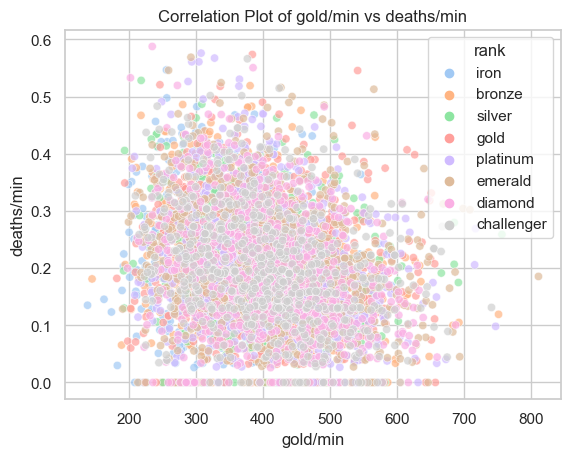

c:\Users\xusha\anaconda3\envs\dsan5000\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


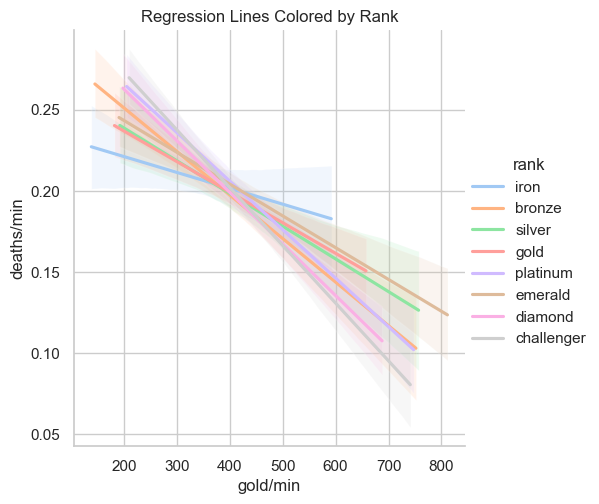

In [19]:
#scatterplot generation for gold/min (x-axis) vs deaths/min (y-axis) variables
sns.scatterplot(x=combined_league_ranks['gold/min'], y=combined_league_ranks['deaths/min'], hue=combined_league_ranks['rank'], alpha=0.7)
plt.title("Correlation Plot of gold/min vs deaths/min")
plt.xlabel("gold/min")
plt.ylabel("deaths/min")
plt.show()

#now do a regression line for the data points for gold/min vs deaths/min
sns.lmplot(data=combined_league_ranks, x='gold/min', y='deaths/min', hue='rank', scatter=False)  # Add regression line

plt.title('Regression Lines Colored by Rank')
plt.xlabel('gold/min')
plt.ylabel('deaths/min')
plt.show()


Although it was a long-shot, I wanted to explore whether the relationship between the amount of ```gold earned per minute``` for a player in each rank and number of player ```deaths per minute``` existed. My thought process was that after a player's character dies in the match, they lose out on opportunities of getting gold and experience points from either farming minions or fighting enemy players, etc. So hypothetically the more a player dies would mean they have a lower ```gold earned per minute``` value. From the plot, the negative slope correlation does support my theory as having a higher ```deaths per minute``` rate then they would have less ```gold earned per minute```. Though, there are massive variations throughout the lines plotted which could be attributed to how inconsistent this relationship is and also how varied the variables are per rank. As we have seen before, the amount of ```gold earned per minute``` does seem to increase as you go higher in rank but the amount of ```deaths per minute``` seems to be consistent throughout all ranks. The lack of uniqueness of ```deaths per minute``` by rank might be a reason the variation of the regression lines are so high for each rank.

#### Confusion Matrix Heatmap of Variables per Time

In [20]:
#subset the dataframe of all variables that scale with time (9 variables)
league_ranks_selected = combined_league_ranks[['gold/min','totalDmg/min','kills/min','deaths/min','dmgObj/min','dmgTurr/min','vision_score/min','totalDmgTaken/min','totalMinions/min']]
print(league_ranks_selected.head())

     gold/min  totalDmg/min  kills/min  deaths/min  dmgObj/min  dmgTurr/min  \
0  381.063465   5081.406518   0.102916    0.068611  216.054889   216.054889   
1  414.718663   3904.311978   0.233983    0.167131  107.699164    14.172702   
2  491.992966   3874.079719   0.562720    0.035170  437.725674    70.762016   
3  533.777498   5586.750471   0.490258    0.075424  399.937146   187.278441   
4  290.358566    567.888446   0.039841    0.079681   56.972112    42.828685   

   vision_score/min  totalDmgTaken/min  totalMinions/min  
0          0.343053         827.684391          6.758148  
1          0.501393         819.810585          4.813370  
2          0.457210         457.069168          5.099648  
3          0.339409         999.522313          7.240729  
4          0.996016         427.410359          0.756972  


<Axes: >

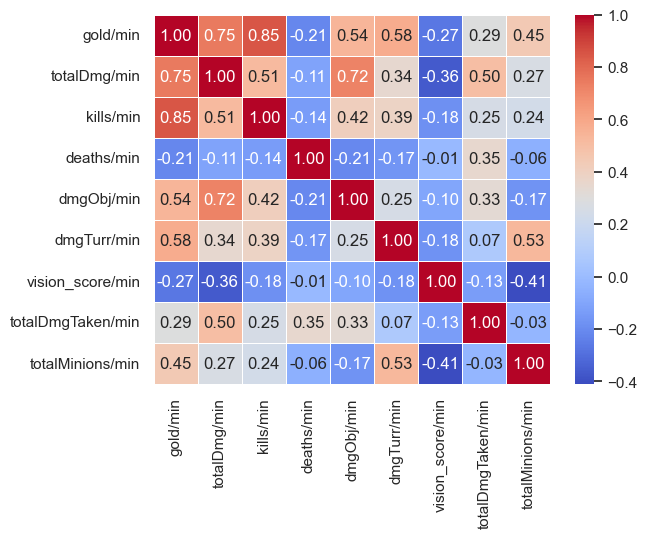

In [21]:
#find correlation of each of the selected variables
league_var_heatmap = league_ranks_selected.corr()
#then put each variable with each other including itself on a heatmap
sns.heatmap(league_var_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


We can see in this heatmap how each variable correlates with each other to summarize all variables quickly in one heatmap. In this confusion matrix, we can verify what I found earlier with Damage Dealt vs Damage Taken and Total gold earned vs Total deaths. We can see that these correlations do seem to appear again where ```deaths/min``` and ```gold/min``` is somewhat negatively correlated (-0.21) and damage dealt/min and damage taken/min has a significant correlation (+0.50). <br><br>
Overall, two variables stick out from the heatmap. According to the matrix, the vision score per minute variable and player deaths per minute seem to the negatively correlate with all other variables. The only positive correlation among the mentioned variables is with ```deaths per minute``` versus ```total damage taken per minute``` which makes sense as dying more times means higher amount of damage being taken (more damage taken means more ways of reaching 0 health points or hp). These ideas are relatively understandable as placing and clearing vision on the map as well as dying within the match takes away time from gaining gold, dealing damage, or fighting other players. All other variables seem to be mostly positve correlated with each other except with the mentioned variables that show negative correlations. <br><br> 
Some interesting variables that include a decent mix of positive and negative correlations are minions farmed per minute and damage taken per minute. These variables could thus be analyzed further as these variables show some unique changes in correlations based on different variables within a match.

## Data Grouping and Segmentation of Platinum Rank

Across all ranks in all the variables being briefly explored, I can see that the rank ```Platinum``` is almost always the middle of pack. They follow trends that correlate to rank and is always found to have the middle values. So, in this section I plan on looking into the variables that I think are significant in determining a player's skill (gold earned, total damage dealt to objectives, and total damage dealt to turrets) for the ```Platinum``` rank in the dataset. <br><br>
The point in this section is to see which subclass (or position) for a player is more relevant for my future prediction model. From domain knowledge, one can recognize the ```Utility``` role as an outlier of sorts as their match data will significantly differ from the rest of the players. This will be most apparent in gold earned which I will try to confirm as well.

#### Examining Features in Platinum Rank for Position Subclasses

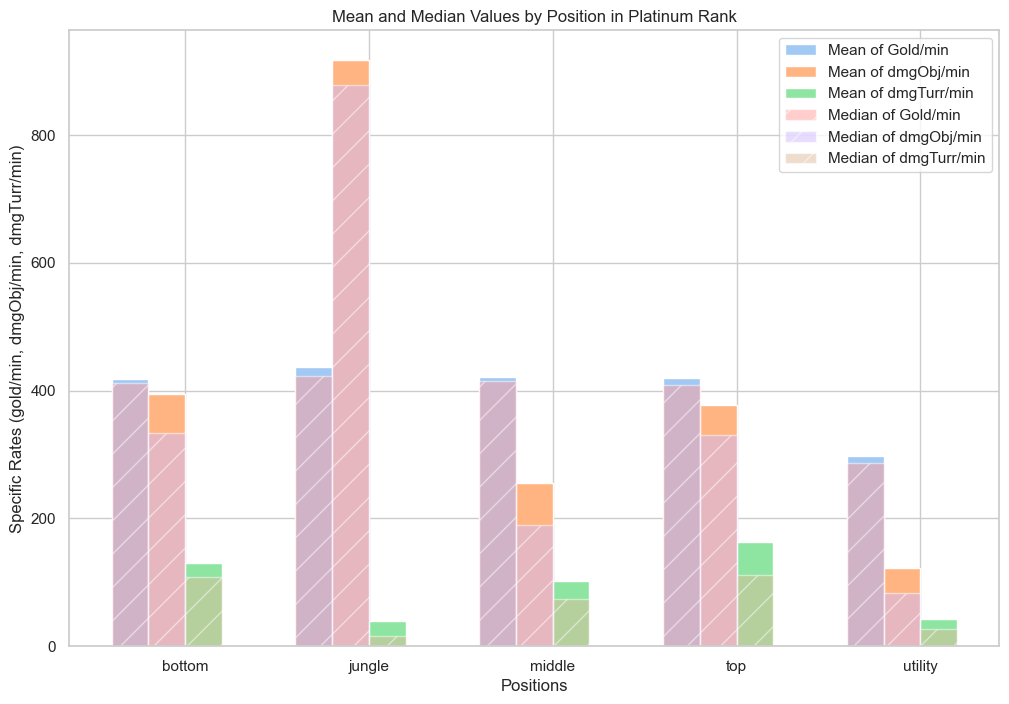

In [51]:
#first subset the original dataset with just rank == 'platinum'
plat_index = combined_league_ranks['rank'] == 'platinum'
plat_match_data = combined_league_ranks[plat_index]

#group by position then create bar plot of the mean and median of
#three variables: gold/min, dmgObj/min, dmgTurr/min, and vision_score/min
plat_agg_df = plat_match_data.groupby('position').agg({'gold/min': ['mean', 'median'],
                                   'dmgObj/min': ['mean', 'median'],
                                   'dmgTurr/min': ['mean', 'median']})
agg_df = plat_agg_df.reset_index()

#configure plot
bar_width = 0.2
index = np.arange(len(agg_df['position']))

plt.figure(figsize=(12, 8))

# plot the bars for mean
plt.bar(index - 3*bar_width/2, agg_df['gold/min']['mean'], bar_width, label='Mean of Gold/min')
plt.bar(index - bar_width/2, agg_df['dmgObj/min']['mean'], bar_width, label='Mean of dmgObj/min')
plt.bar(index + bar_width/2, agg_df['dmgTurr/min']['mean'], bar_width, label='Mean of dmgTurr/min')


# plot the bars for median
plt.bar(index - 3*bar_width/2, agg_df['gold/min']['median'], bar_width, label='Median of Gold/min', alpha=0.5, hatch='/')
plt.bar(index - bar_width/2, agg_df['dmgObj/min']['median'], bar_width, label='Median of dmgObj/min', alpha=0.5, hatch='/')
plt.bar(index + bar_width/2, agg_df['dmgTurr/min']['median'], bar_width, label='Median of dmgTurr/min', alpha=0.5, hatch='/')


plt.title('Mean and Median Values by Position in Platinum Rank')
plt.xlabel('Positions')
plt.ylabel('Specific Rates (gold/min, dmgObj/min, dmgTurr/min)')
plt.legend()
plt.xticks(index, agg_df['position'])
plt.show()

We see that almost across all roles, that the amount of gold obtains is consistent except for ```Utility``` role. Also, the damage done to ```objectives per minute``` is significantly larger for the ```jungle``` position. So, if I were to specifically look into consistent roles for some average player then I would only look into bottom, middle, and top lanes as they have the most similar ```gold earned per minute```, ```damage dealt to objectives per minute```, and ```damage dealt to turrets per minute```. <br><br>

Now in this plot, we can see that utility is a significantly different role in terms of these variables. They have less gold than all other positions and even less damage dealt overall to turrets and objectives alike. So moving forward, ```utility``` as position should not be included as it is an outlier class.
<br><br>
In a separate project, I could possibly also use these variations with the lanes to ```jungle``` or ```utility``` to predict what position a player was in some match given their match data.

#### Outliers

From the Data grouping and segmentation, I looked into the subclasses of a specific rank: ```Platinum```. This was because that rank was in the middle of the pack across almost all variables in the dataset. Thus, I decided to look into the subclasses ```"position"``` of the rank ```Platinum``` to discover any out of the ordinary subclasses that I might have to remove. <br><br>

From the data grouping section, I learned that the __"utility"__ position showed irregular values compared to the usual gold earned as well as damage dealt to turrets and damage dealt to objectives. So this subclass would thus be considered an __outlier__ as this could hinder the quality of the prediction model that I will do later. <br><br>

Another anomaly that should be addressed is how inflated the damage dealt to objectives is for position ```"jungle"```. This makes sense as that role has the most interaction with objectives. The issue is that its so significantly high that the average ```damage dealt on objectives``` for ranks that contain more ```"jungle"``` positions will have higher values. This is an issue that targets the integrity of the consistency for the prediction model. So I will also ignore the subclass "jungle" in my prediction model.

## Hypothesis Refining

From my exploration of the dataset that I will be using for my project, I have a much better understanding of what each variable defines and how each variable actually correlates with each other. <br><br>
To understand how to enhance skill based matchmaking systems for competitive video games, it is important to understand how each variable in the game changes and affects each other within a match. And for our example competitive video game *League of Legends* that we explored we can see that there are variables that might need to be removed or included into other variables. <br><br>
__New Research Questions to Focus On:__ 

- What variables, as seen in *League of Legends*, are most important in impacting predictive power of unseen data? 
  
- Are these features what determine a player's rank the best then? 
  
- Are there any overlapping features in *League of Legends* that other competitive video games have and are these features impactful in predicting a player's rank?

## Report/Discuss Methods and Findings

So from the overall findings from my EDA process, I realized that the variables that I collected from the Riot API contains multiple variables that seem both significant and insignificant. Namely, the deaths variable seems to be a consistent constant across all ranks meaning that the use of that variable might not prove useful. Other variables sometimes also correlate significantly well with each other like __Total Damage Dealt per minute__ versus __Total Damage Taken per minute__ so I will have to investigate these sorts of correlations more with feature selection. <br><br>
Something else that should be addressed is the use of subclasses ```"utility"``` and ```"jungle"```. They contain somewhat outlier-like values that would hurt my prediction model in the future. These roles are unique and are thus special playstyles. To include them when the majority of the other roles consistently match would hinder the overall calculation of rank benchmarks for prediction.

## Tools and Software

I plan on working with Naive Bayes as well as working with matrices/dataframes. I also will work with making visualizations. Thus, the packages that I will work with will be but not limited to: ```Pandas```, ```Numpy```, ```Scikit-learn```, ```Seaborn```, ```Matplotlib```, and ```R``` to name a few.